# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Final Analysis
- The Capolmulin and Ramicane drugs were tested on the most mice while the Propriva was tested on the least number of mice.
- All drugs were tested on a large enough sample size to consider the results.
- Based on the data the Capomulin and Ramicane drugs were the most successful in reducing the final tumor size.
- There is strong evidence that there is a correlation with the tumor size being larger in the mice weigh more with a correlation rate of .84.
- There is one outlier in the Infubinol that should be ignored.

In [222]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_drug_results_df = pd.merge(study_results, mouse_metadata,
                                 how='left', on='Mouse ID')

# Display the data table for preview 
combined_drug_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [223]:
mouse_metadata.info

<bound method DataFrame.info of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>

In [224]:
mouse_metadata.describe

<bound method NDFrame.describe of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>

In [225]:
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [226]:
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [227]:
study_results.info

<bound method DataFrame.info of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>

In [228]:
study_results.describe

<bound method NDFrame.describe of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>

In [229]:
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [230]:
study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [231]:
# Checking the number of mice.
mouse_count = len(combined_drug_results_df["Mouse ID"].unique())
mouse_count

249

In [232]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_drug_results_df.loc[combined_drug_results_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids
#combined_drug_results_df['Mouse ID'].value_counts()

array(['g989'], dtype=object)

In [233]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_drug_results_df.loc[combined_drug_results_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [234]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results_df = combined_drug_results_df[combined_drug_results_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [235]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_results_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [236]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).mean()
median = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).median()
var = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).var()
std = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).std()
sem = clean_results_df['Tumor Volume (mm3)'].groupby(clean_results_df['Drug Regimen']).sem()

summary_results = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_results


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [237]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_results_2 = clean_results_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_results_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

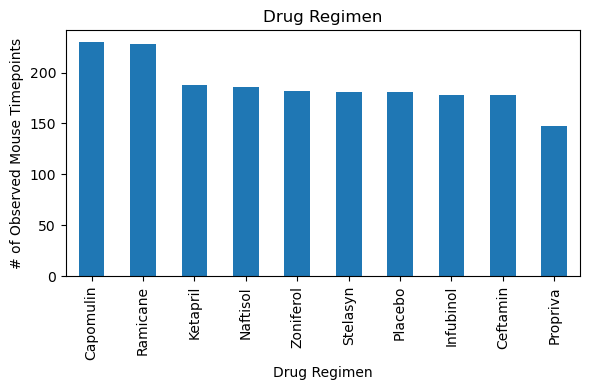

In [238]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Filter the DataFrame down to the results to chart
mouse_count_regimen = clean_results_df["Drug Regimen"].value_counts()
mouse_count_regimen

mouse_count_regimen.plot(kind="bar", figsize=(6,4))

# Set a title for the chart
plt.title("Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#plt.show()
plt.tight_layout()

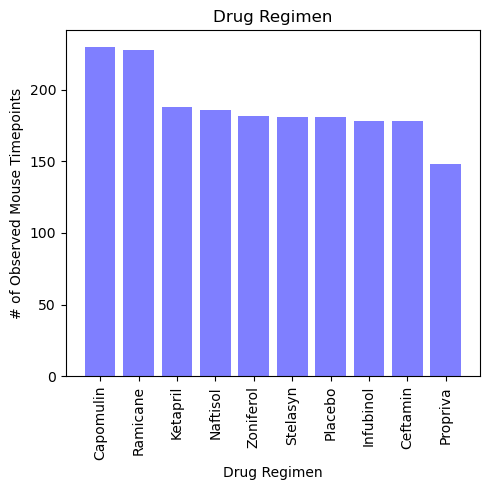

In [239]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = mouse_count_regimen.index.values
y_axis = mouse_count_regimen.values

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(5,5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

# Set a Title and labels
plt.title("Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")

# Save our graph and show the grap
plt.tight_layout()
#plt.savefig("../Images/")
plt.show()


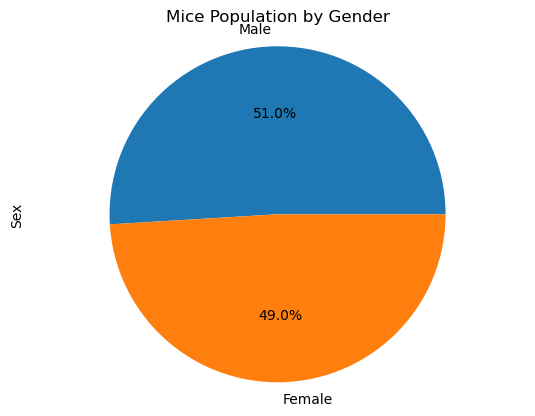

In [240]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_results = clean_results_df["Sex"].value_counts()
plt.title("Mice Population by Gender")
gender_results.plot(kind = "pie",autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

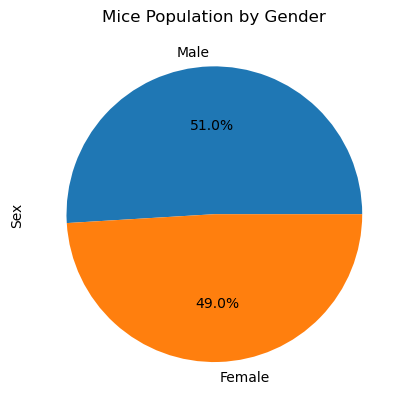

In [241]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = ['Female', 'Male']
gender_sizes = [49.7999197, 50.200803]
plot = gender_results.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Mice Population by Gender')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [242]:
# Start by getting the last (greatest) timepoint for each mouse
Max_Tumor = clean_results_df.groupby('Mouse ID').max()['Timepoint']
Max_Tumor = Max_Tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merge_data = Max_Tumor.merge(clean_results_df, on=("Mouse ID","Timepoint"),how="left")
Merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [243]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
Drug_Volume = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

Tumor_Vol_List = []
# Getting the last (greatest) timepoint for each mouse for the for loop

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Drug_Volume:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    Final_Tumor_Volume = Merge_data.loc[Merge_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
   
    # add subset 
    Tumor_Vol_List.append(Final_Tumor_Volume)


    quartiles = Final_Tumor_Volume.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    outliers = Final_Tumor_Volume.loc[(Final_Tumor_Volume < lower_bound) | (Final_Tumor_Volume > upper_bound)]
    outliers

    if Treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"Outliers are {outliers}")
    print(f"------------------------------------------------------------")
    Treatment+=1


The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
Outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
Outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 cou

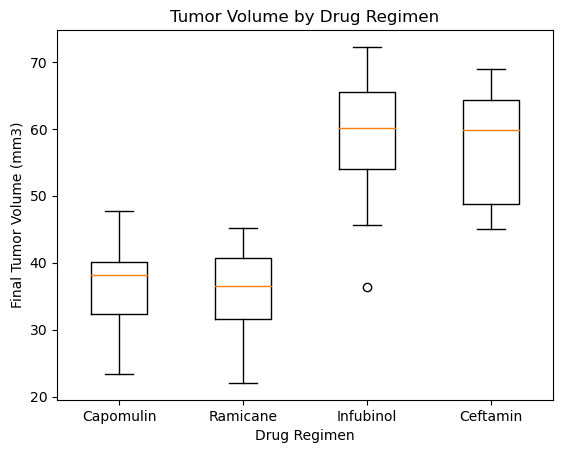

In [244]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Drug_Results = []
for drug in Drug_Volume:
    Drug_Results.append(list(Drug_last_timepoint[drug].dropna()))

Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']    
fig = plt.figure()
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(Drug_Results, labels= Regimen)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

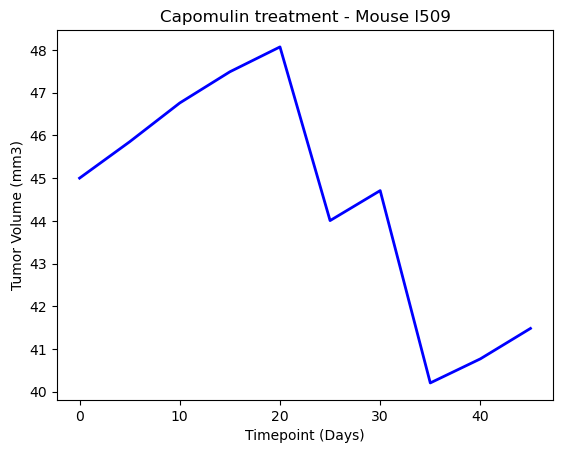

In [246]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Results_line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
Results_line_df.head()
x_axis = Results_line_df["Timepoint"]
tumsiz = Results_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment - Mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

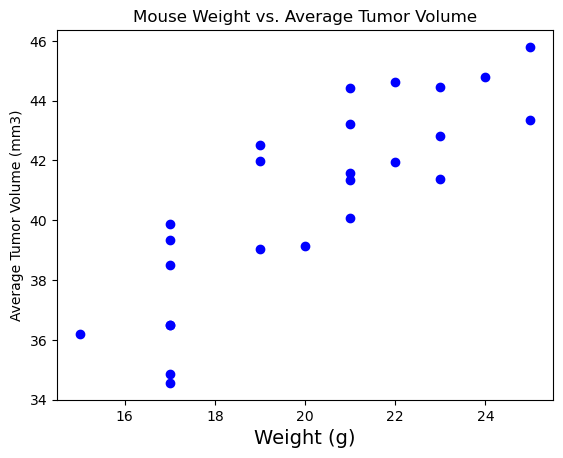

In [247]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
average_capomulin_volume = Capomulin_df.groupby(['Mouse ID'])[["Weight (g)","Tumor Volume (mm3)"]].mean()


marker_size=15
plt.scatter(average_capomulin_volume['Weight (g)'],average_capomulin_volume['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


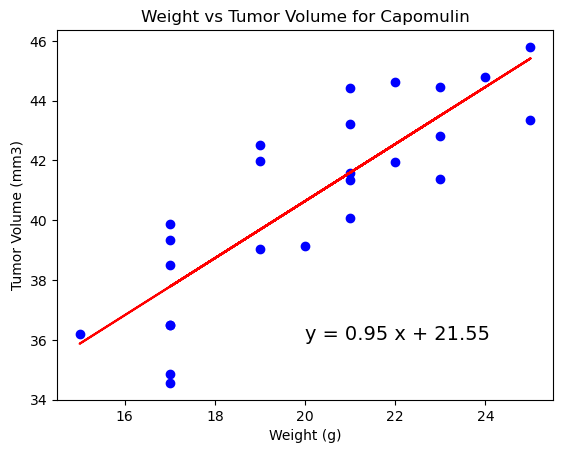

In [248]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(average_capomulin_volume['Weight (g)'],average_capomulin_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(average_capomulin_volume["Weight (g)"],average_capomulin_volume["Tumor Volume (mm3)"])
regress_values=average_capomulin_volume["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(average_capomulin_volume["Weight (g)"],average_capomulin_volume["Tumor Volume (mm3)"],color='b')
plt.plot(average_capomulin_volume["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()